# Using ML to predict the Sale Price of Bulldozers 

## <span style="color:red">1. Problem Definition
Predicting the future sale price of bulldozers, taking into account characteristics and examples of how much similar bulldozers have been sold for.
## <span style="color:red">2. Data
##### Bluebook for Bulldozers
Link to data & details: https://www.kaggle.com/c/bluebook-for-bulldozers/data
<p></p>

##### Background information on CSVs:
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.
## <span style="color:red">3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
For more see: www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation.
<p></p>
(The goal will be to minimize the RMSLE.)
<p></p>

## <span style="color:red">4. Features
A data dictionary is provided by Kaggle. See: https://www.kaggle.com/competitions/bluebook-for-bulldozers/data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("data/TrainAndValid.csv",low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

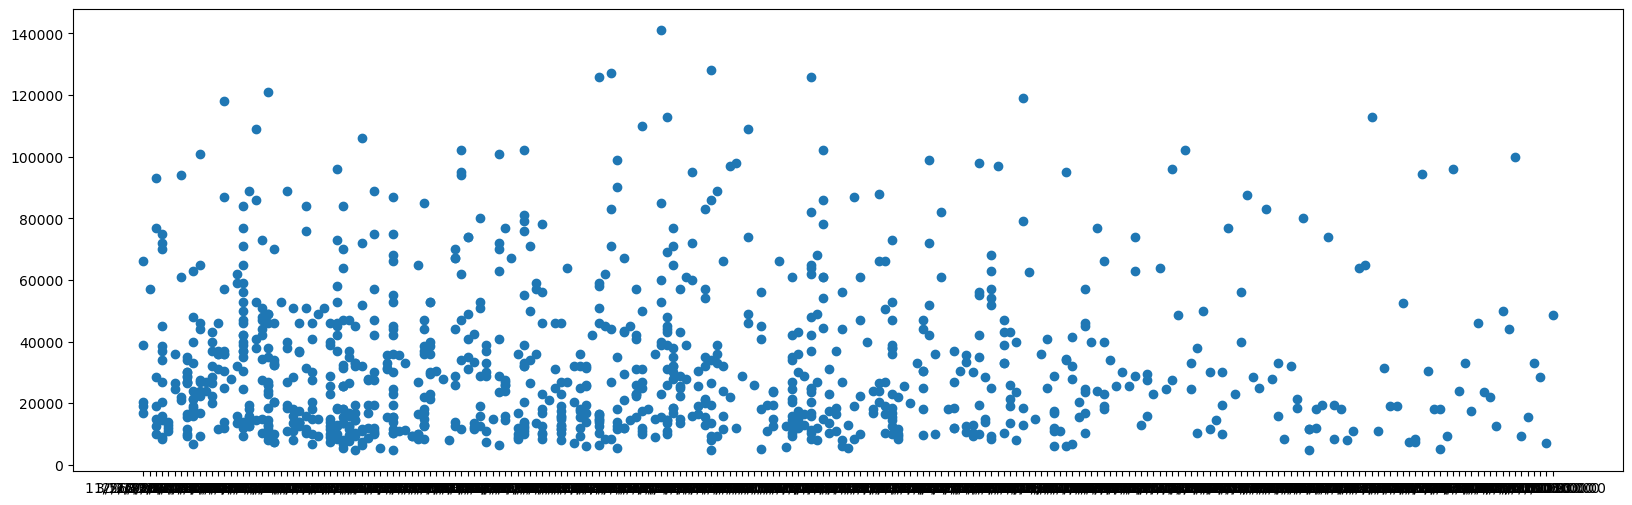

In [5]:
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

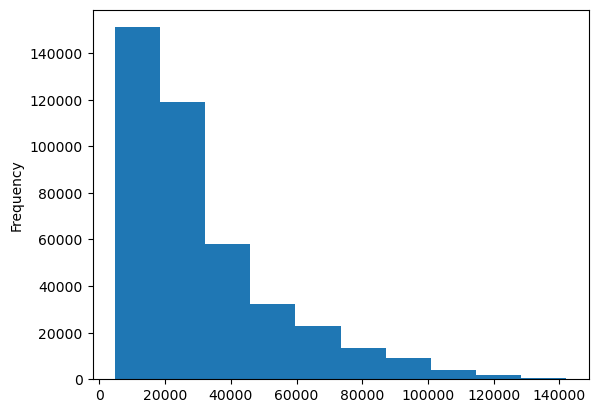

In [6]:
df["SalePrice"].plot.hist();

### Parsing dates
The original datatype of each value in the "saledate" column is of type "object" (= str) and needs to be converted into datetime object.

In [7]:
df["saledate"][:3]

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
Name: saledate, dtype: object

In [8]:
df["saledate"].dtype

dtype('O')

In [9]:
type(df["saledate"][0])

str

In [10]:
# re-load of data set (TrainsAndValid.csv)
df = pd.read_csv("data/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])

In [11]:
df["saledate"][:3]

0   2006-11-16
1   2004-03-26
2   2004-02-26
Name: saledate, dtype: datetime64[ns]

In [12]:
df["saledate"].dtype

dtype('<M8[ns]')

In [13]:
type(df["saledate"][0])

pandas._libs.tslibs.timestamps.Timestamp

### Sorting DataFrame by "saledate" column

In [14]:
df.sort_values(by="saledate",inplace=True,ascending=True)

In [15]:
df["saledate"].head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

### Creating a backup of modified DataFrame (by copying df)

In [16]:
df_tmp = df.copy()

### Adding datetime params for "saledate" column
Each value in the "saledate" column will be extracted and saved in its own column. Afterwards the "saledate" column will be deleted.

In [17]:
df_tmp["saleYear"] = df_tmp["saledate"].dt.year
df_tmp["saleMonth"] = df_tmp["saledate"].dt.month
df_tmp["saleDay"] = df_tmp["saledate"].dt.day
df_tmp["saleDayOfWeek"] = df_tmp["saledate"].dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp["saledate"].dt.dayofyear

In [18]:
df_tmp.drop(columns=["saledate"],inplace=True)

## <span style="color:red">5. Modelling

In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# next step would be to fit the model:
# model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

# in the current state the fitting will provoke a ValueError,
# since 44 columns in the data set are not of numeric data types,
# hence, (the commented-out code will not be executed and)
# the non-numeric data types have to be converted first into a processible, i.e. numeric data type

In [20]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [21]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


### Converting Non-Numeric Objects (strings & NaN) to Categorical Data
In order to use the data for ML model(s), it has to be converted from String- or NaN-objects to categorical data. Hence, the goal of the following modification is to change all non-numeric objects into numeric objects.
<p></p>
An overview of how to search for data types with pandas is to be found here: <a href="https://pandas.pydata.org/docs/reference/arrays.html">pandas documentation</a> (see the subchapter "Utilities").


In [22]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [23]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [24]:
# Portays missing data per column in percent (%)
df_tmp.isna().sum() / len(df_tmp) * 100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

### Saving processed data

In [25]:
df_tmp.to_csv("data/train_tmp.csv", index=False)

In [26]:
#df_tmp = pd.read_csv("data/train_tmp.csv", low_memory=False)
#df_tmp.head()

In [27]:
#df_tmp.info()

In [28]:
# since the goal is to predict the sale price for bulldozers for the year 2012
# based on data from 1989 to 2011, two DataFrames are created
# (one only with the sale year 2012 and one excluding the sale year 2012)

df_train = df_tmp[df_tmp["saleYear"] != 2012]
df_val = df_tmp[df_tmp["saleYear"] == 2012]

len(df_train), len(df_val)

(401125, 11573)

### Filling missing numeric values with the median of the existing ones

###### filling df_train

In [29]:
count = 0
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            count+=pd.isnull(content).sum()
if count > 0:
    print(f"count: {count}")
else:
    print(f"count: {count} (no NaN / null-values in the data set)")

auctioneerID
MachineHoursCurrentMeter
count: 278496


In [30]:
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #df_train[label+"_is_missing"] = pd.isnull(content)
            df_train[label] = content.fillna(content.median())

/var/folders/xc/s_14kqj93xz65qmhcqrhwwbh0000gn/T/ipykernel_60493/222323178.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label] = content.fillna(content.median())


In [31]:
count = 0
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            count+=pd.isnull(content).sum()
if count > 0:
    print(f"count: {count}")
else:
    print(f"count: {count} (no NaN / null-values in the data set)")

count: 0 (no NaN / null-values in the data set)


###### filling df_val

In [32]:
count = 0
for label, content in df_val.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            count+=pd.isnull(content).sum()
if count > 0:
    print(f"count: {count}")
else:
    print(f"count: {count} (no NaN / null-values in the data set)")

MachineHoursCurrentMeter
count: 6834


In [33]:
for label, content in df_val.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #df_val[label+"_is_missing"] = pd.isnull(content)
            df_val[label] = content.fillna(content.median())

/var/folders/xc/s_14kqj93xz65qmhcqrhwwbh0000gn/T/ipykernel_60493/2597749373.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val[label] = content.fillna(content.median())


In [34]:
count = 0
for label, content in df_val.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            count+=pd.isnull(content).sum()
if count > 0:
    print(f"count: {count}")
else:
    print(f"count: {count} (no NaN / null-values in the data set)")

count: 0 (no NaN / null-values in the data set)


### Filling and turning categorical values into numeric ones

###### fill df_train

In [35]:
count = 0
for label, content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            count+=pd.isnull(content).sum()
if count > 0:
    print(f"count: {count}")
else:
    print("no NaN / null-values in the data set")

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
count: 11310400


In [36]:
for label, content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        #df_train[label+"_is_missing"] = pd.isnull(content)
        df_train[label] = pd.Categorical(content).codes+1 # the +1 is turning the default -1 (= NaN) to 0

/var/folders/xc/s_14kqj93xz65qmhcqrhwwbh0000gn/T/ipykernel_60493/2041828542.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label] = pd.Categorical(content).codes+1 # the +1 is turning the default -1 (= NaN) to 0


In [37]:
count = 0
for label, content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            count+=pd.isnull(content).sum()
if count > 0:
    print(f"count: {count}")
else:
    print("no NaN / null-values in the data set")

no NaN / null-values in the data set


###### fill df_val 

In [38]:
count = 0
for label, content in df_val.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            count+=pd.isnull(content).sum()
if count > 0:
    print(f"count: {count}")
else:
    print("no NaN / null-values in the data set")

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
count: 322001


In [39]:
for label, content in df_val.items():
    if not pd.api.types.is_numeric_dtype(content):
        #df_val[label+"_is_missing"] = pd.isnull(content)
        df_val[label] = pd.Categorical(content).codes+1 # the +1 is turning the default -1 (= NaN) to 0

/var/folders/xc/s_14kqj93xz65qmhcqrhwwbh0000gn/T/ipykernel_60493/488669344.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val[label] = pd.Categorical(content).codes+1 # the +1 is turning the default -1 (= NaN) to 0


In [40]:
count = 0
for label, content in df_val.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            count+=pd.isnull(content).sum()
if count > 0:
    print(count)
else:
    print(f"count: {count} (no NaN / null-values in the data set)")

count: 0 (no NaN / null-values in the data set)


In [41]:
X_train, y_train = df_train.drop("SalePrice",axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice",axis=1), df_val["SalePrice"]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 56), (401125,), (11573, 56), (11573,))

### Model score

In [42]:
%%time
# instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)
# fit model
model.fit(X_train,y_train)

CPU times: user 9min 49s, sys: 2.62 s, total: 9min 52s
Wall time: 1min 20s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [43]:
# tested data is based on the same training data, which results in high score
# (nearly 99%), but that means that no generalization can be drawn out of this

model.score(X_train,y_train)

0.9875169449218242

### Build an evaluation function

In [46]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

def show_scores(model):
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_pred),
              "Valid MAE": mean_absolute_error(y_valid, val_pred),
              "Training RMSLE": rmsle(y_train, train_pred),
              "Valid RMSLE": rmsle(y_valid, val_pred),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [47]:
show_scores(model)

{'Training MAE': 1577.284350439389,
 'Valid MAE': 6116.2649952475585,
 'Training RMSLE': 0.08423102061167131,
 'Valid RMSLE': 0.2539457277596399,
 'Training R^2': 0.9875169449218242,
 'Valid R^2': 0.8727631796025311}

### Hyperparameter tuning with RandomizedSearchCV

In [59]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators":np.arange(10,100,10),
           "max_depth":[None,3,5.10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2),
           "max_features":[0.5,1,"sqrt","auto"],
           "max_samples":[200000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/andrezempelburg/Desktop/IT/sample_project/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
285 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
185 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/andrezempelburg/Desktop/IT/sample_project/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andrezempelburg/Desktop/IT/sample_project/env/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/andrezempelburg/Desktop/IT/sample_project/env/lib/p

CPU times: user 3min 29s, sys: 26.7 s, total: 3min 55s
Wall time: 14min 32s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5.1],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [200000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [60]:
# best model hyperparams
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_samples': 200000,
 'max_features': 0.5,
 'max_depth': None}

In [61]:
show_scores(rs_model)

{'Training MAE': 3295.803950112111,
 'Valid MAE': 5990.569984162557,
 'Training RMSLE': 0.16256813636020337,
 'Valid RMSLE': 0.24719742427678523,
 'Training R^2': 0.9469585992128694,
 'Valid R^2': 0.8792334888836711}

In [63]:
%%time
best_hyperparams_model = RandomForestRegressor(n_estimators=50,
                                               min_samples_split=2,
                                               min_samples_leaf=3,
                                               max_features=0.5,
                                               max_samples=None,
                                               max_depth=None,
                                               random_state=42)
best_hyperparams_model.fit(X_train,y_train)

CPU times: user 1min 20s, sys: 192 ms, total: 1min 20s
Wall time: 1min 20s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=50,
                      random_state=42)

In [64]:
show_scores(best_hyperparams_model)

{'Training MAE': 2525.4187237061715,
 'Valid MAE': 5939.63376614601,
 'Training RMSLE': 0.12873055966739086,
 'Valid RMSLE': 0.244638179725565,
 'Training R^2': 0.9675843509111061,
 'Valid R^2': 0.8809871396243377}

### Make predictions on test data set

In [82]:
# import of test data set
df_test = pd.read_csv("data/Test.csv",low_memory=False,parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [83]:
# test data set is given as argument to best hyperparam model
test_pred = best_hyperparams_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- saleDay
- saleDayOfWeek
- saleDayOfYear
- saleMonth
- saleYear


In [85]:
def preprocess_data(df):
    df["saleYear"] = df["saledate"].dt.year
    df["saleMonth"] = df["saledate"].dt.month
    df["saleDay"] = df["saledate"].dt.day
    df["saleDayOfWeek"] = df["saledate"].dt.dayofweek
    df["saleDayOfYear"] = df["saledate"].dt.dayofyear
    
    df.drop("saledate",
            axis=1,
            inplace=True)
    
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
    
        if not pd.api.types.is_numeric_dtype(content):
            #df[label+"_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [86]:
df_test = preprocess_data(df_test)
df_test.shape

(12457, 56)

In [87]:
X_train.shape

(401125, 56)

In [88]:
test_pred = best_hyperparams_model.predict(df_test)

In [89]:
df_pred = pd.DataFrame()
df_pred["SalesID"] = df_test["SalesID"]
df_pred["SalesPrice"] = test_pred
df_pred

,SalesID,SalesPrice
0,1227829,16561.361827
1,1227844,17617.537157
2,1227847,50528.826118
3,1227848,63777.769841
4,1227863,54040.255051
...,...,...
12452,6643171,40027.601732
12453,6643173,12966.268398
12454,6643184,12872.397763
12455,6643186,16608.452062


In [90]:
df_pred.to_csv("data/test_pred.csv",index=False)

In [95]:
def plot_features(columns,importances,n=20):
    df = (pd.DataFrame({"features":columns,
                        "feature_importances":importances})
          .sort_values("feature_importances",
                       ascending=False)
          .reset_index(drop=True))
    
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n],
            df["feature_importances"][:20])
    ax.set_xlabel("Feature importance")
    ax.set_ylabel("Features")
    ax.invert_yaxis()

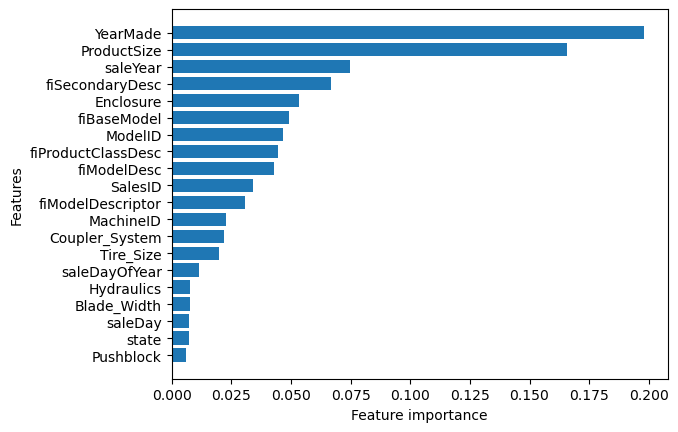

In [96]:
plot_features(X_train.columns,best_hyperparams_model.feature_importances_)